# Calculating Reserves & Forests: DCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dca_df = pd.read_csv('https://raw.githubusercontent.com/yohanesnuwara/pyreservoir/master/data/norne_production_rate_sample.csv',
                     index_col = 0 , parse_dates = True)

dca_df.head()

,Rate (SCF/d)
Date,
2004-04-01,2706039.0
2004-05-01,2492086.2
2004-06-02,1816846.1
2004-07-02,1920207.4
2004-07-04,1683521.4


In [3]:
dca_df.to_csv('production_rate.csv')

### Visualize the data

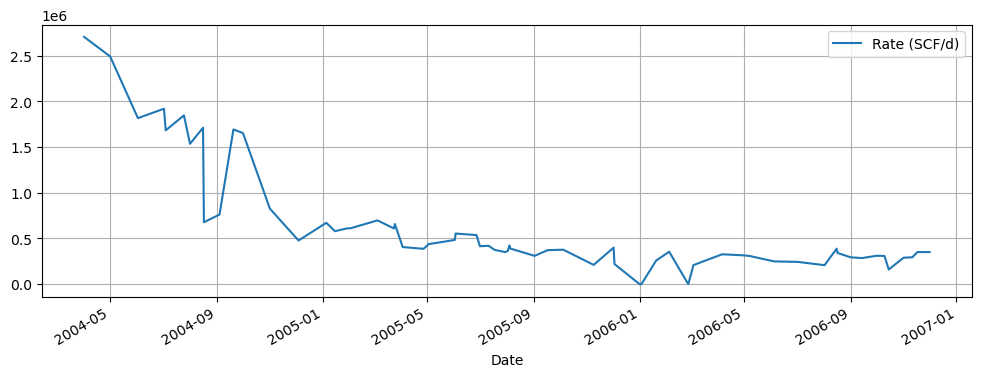

In [4]:
plt.style.use('default')
dca_df.plot(figsize=(12,4), grid=True)
plt.show()

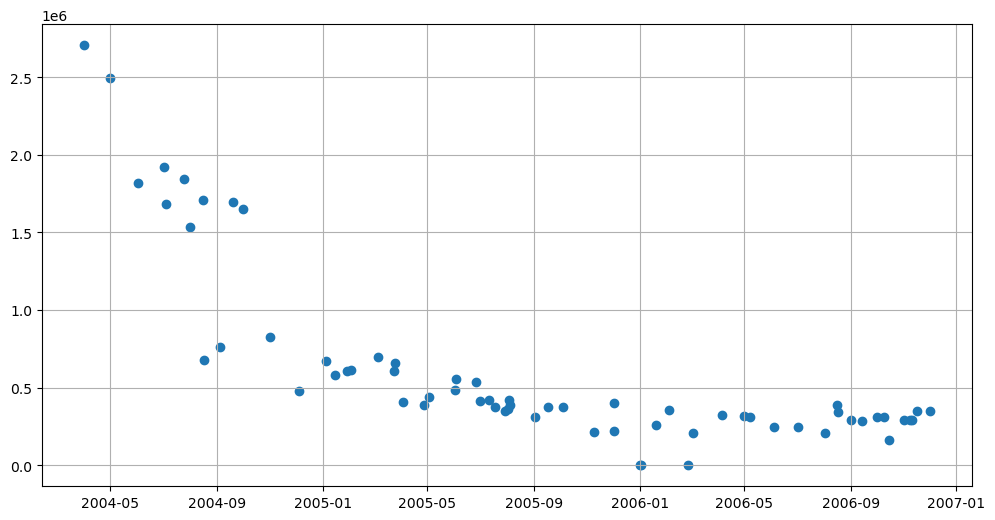

In [6]:
plt.figure(figsize=(12,6))
plt.scatter(y=dca_df['Rate (SCF/d)'],x =dca_df.index, marker='o')
plt.grid()

In [7]:
def day_maker(df):
    '''
    Pass a Time-series dataframe to it and it will returns a days column.
    Substracts dates and makes days
    '''
    days = []
    
    for d in range(len(df)):
        delta = df.index[d]-df.index[0]
        
        days.append(delta.days)
        
    days = np.array(days)
    
    return days

In [8]:
dca_df['days'] = day_maker(dca_df)

In [9]:
dca_df.head()

,Rate (SCF/d),days
Date,,
2004-04-01,2706039.0,0
2004-05-01,2492086.2,30
2004-06-02,1816846.1,62
2004-07-02,1920207.4,92
2004-07-04,1683521.4,94


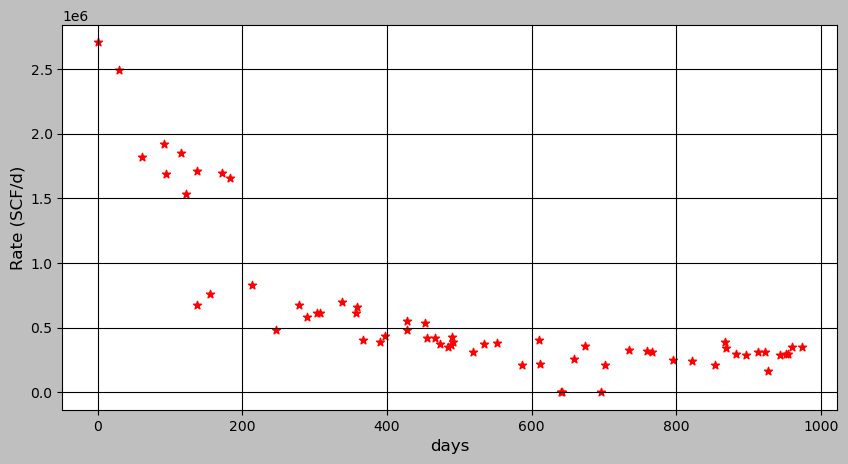

In [12]:
plt.figure(figsize=(10,5))
plt.style.use('grayscale')

plt.scatter(x=dca_df['days'],y=dca_df['Rate (SCF/d)'],marker='*',color='red')
plt.xlabel('days',size=12)
plt.ylabel("Rate (SCF/d)",size=12)
plt.grid()

## Decline Curve Fit model

In [14]:
from scipy.optimize import curve_fit

Decline Curve fit model

$ {q_hyp} = \frac {q_i}{(1+bdt) ^ {1/b}}$

In [24]:
def q_hyp(t,qi,b,d):
    
    qfit = qi/(np.abs((1 + b*d*t))**(1/b))
    
    return qfit

def hyp_fitter(q,t):
    # first we have to normalize so that it converges well and quick.
    
    q_n = q/max(q)
    t_n = t/max(t)
    
    #curve fit (optimization of parameters)
    
    params = curve_fit(q_hyp,t_n,q_n)
    [qi,b,d] = params[0]
    
    
    d_f = d/max(t)
    qi_f = qi*max(q)
    
    # now we can use these parameters.
    q_hyp_fit = q_hyp(t,qi_f,b,d_f)
    
    return q_hyp_fit, params

In [25]:
q = dca_df['Rate (SCF/d)']
t = dca_df['days']

q_fit ,params = hyp_fitter(q,t)

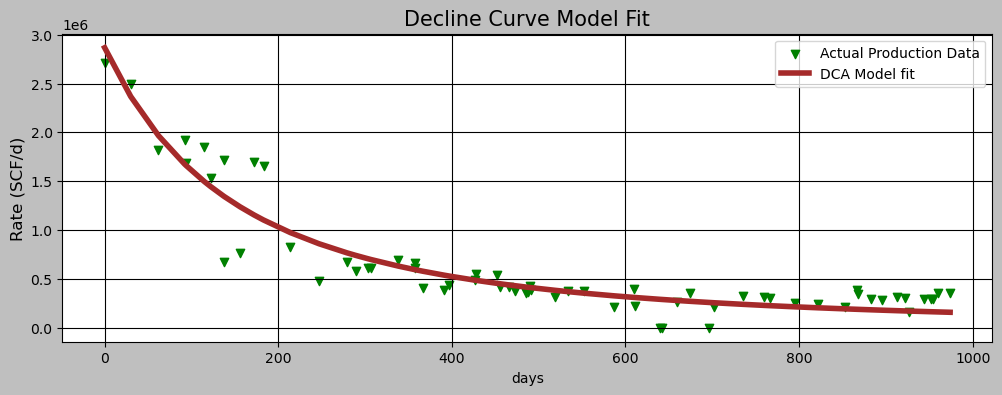

In [26]:
plt.figure(figsize=(12,4))
plt.scatter(t,q, marker='v', color='green', label='Actual Production Data')
plt.plot(t,q_fit, color='brown', lw=4, label='DCA Model fit')

plt.ylabel('Rate (SCF/d)', size=12)
plt.xlabel('days')
plt.title('Decline Curve Model Fit',size=15)
plt.grid()
plt.legend()